**🔒 Proprietary & All Rights Reserved**

**© 2025 Sweety Seelam.** This work is proprietary and protected by copyright. All content, models, code, and visuals are © 2025 Sweety Seelam. 
No part of this project, app, code, or analysis may be copied, reproduced, distributed, or used for any purpose—commercial or otherwise—without explicit written permission from the author.

-------------

# StreamIntel360: A Multi-Agent RAG Platform for Streaming Content & Revenue Intelligence

-----------

# 01 – Data Exploration: Netflix Titles Catalog

This notebook explores the `netflix_titles.csv` dataset used by StreamIntel360.

**Goals:**
- Load and inspect the raw dataset.
- Check for missing values and data quality issues.
- Understand distributions of:
  - Content type (Movie vs TV Show)
  - Release year
  - Countries
  - Genres (`listed_in`)
- Generate basic plots for inclusion in the README / report.

--------

## Introduction
Streaming platforms collectively spend tens of billions of dollars every year on original series, movies, stand-up specials, and licensed content. 
A single unsuccessful big-budget show can represent tens to hundreds of millions of dollars of lost opportunity. Content and strategy teams must constantly answer:

•	Which concepts will resonate with global audiences?                            
•	How does this concept compare to previous titles in terms of risk and upside?                               
•	What regions, age groups, and segments are the best initial targets?                                    
•	How does this fit into the platform’s existing catalog and brand?                                       

Traditional methods rely heavily on human intuition, small focus groups, and retrospective analysis. AI can extend this capability by synthesizing massive amounts of structured and unstructured data: catalogs, ratings, reviews, genres, trends, and competitive information.

--------

## Business Challenge

Streaming companies need to make better, faster, more data-informed decisions about what content to produce, acquire, or promote, under uncertainty and with incomplete information.

Specific challenges:

**Content Greenlighting**                                        
o	Evaluating new scripts/ideas vs historical successes/failures.

**Audience Fit & Localization**                                   
o	Identifying which regions, segments, or demographics are most likely to adopt a show.

**Competitive Saturation**                                      
o	Understanding if a genre/topic is over- or under-served across platforms.

**Revenue / Engagement Impact**                   
o	Estimating engagement potential, retention, and indirect revenue impact.

**Decision Transparency**                   
o	Explaining why a given title appears promising or risky, in terms of similar titles, sentiment, genre trends, etc.

-------

## Objectives

**Business Objectives**                          
•	Provide a “Content Intelligence Copilot” that supports strategists, producers, and analysts.

•	Reduce the time to evaluate a new concept from days/weeks to minutes.

•	Improve decisions by surfacing similar past titles, audience patterns, and risks.

**Technical Objectives**

•	Implement a production-aligned stack:       

        FastAPI backend                      
        Next.js frontend                      
        LangChain + LangGraph agent orchestration                        
        Vector database (ChromaDB) for RAG                    

•	Build multiple specialized agents working together:    

        Content Scout, Audience Fit, Competitive Intelligence, etc.                     
    
•	Enable conversational interaction (AI chatbot) + structured analysis reports. 

•	Make the architecture modular for future scaling and deployment.

-----------

## Dataset Information

1.	Netflix Movies and TV Shows (Kaggle) – netflix_titles.csv / variants

Contains title, type, director, cast, country, date added, release year, rating, duration, listed_in (genres), description. Kaggle+1

2.	Netflix TV Shows and Movies – titles + cast (Kaggle)

3.	The Movies Dataset (Kaggle)

Metadata from TMDB: genres, keywords, cast/crew, ratings. Kaggle

4.	IMDb Non-Commercial Datasets (ratings, basics)

For averageRating, numVotes, etc., respecting non-commercial use license. IMDb Developer+1

6.	Movie Review / Sentiment Datasets (IMDB 50K reviews, Stanford Large Review Dataset) for sentiment modeling.

----------------

In [1]:
# Cell 1 - Install dependencies
!pip install pandas numpy matplotlib seaborn

In [2]:
# Cell 2 – Code: Imports & Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

DATA_DIR = Path("..") / "data" / "raw"
FILE_PATH = DATA_DIR / "netflix_titles.csv"

FILE_PATH, FILE_PATH.exists()

# Explanation: 
# We set consistent plotting style. FILE_PATH points to ../data/raw/netflix_titles.csv from the notebooks/ folder. 
# Last line prints path + True/False if file exists (helps debug path issues).

(WindowsPath('../data/raw/netflix_titles.csv'), True)

In [3]:
# Cell 3 – Code: Load Data
df = pd.read_csv(FILE_PATH, encoding="latin-1")

# Drop completely empty columns (typical Excel artifacts like Unnamed: 16, etc.)
df = df.dropna(axis=1, how="all")

# Also drop any "Unnamed: X" columns just in case
df = df.loc[:, ~df.columns.str.contains(r"^Unnamed")]

df.head()

# Explanation: 
# Loads the CSV into a DataFrame. Displays the first rows so you can visually confirm columns.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Cell 4 – Code: Basic Info
df.shape, df.columns

df.info()

# Explanation: 
# See number of rows/columns and data types. 
# Verify things like release_year is int, date_added is object (string), etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [5]:
# Cell 5 – Code: Missing Values
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts

missing_pct = (missing_counts / len(df) * 100).round(2)
missing_pct

# Explanation: 
# Finds how many missing values each column has and what % that is. Helps decide which columns are reliable for modeling.

director        29.90
country          9.43
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [6]:
# Cell 6 – Code: Unique Counts & Basic Stats
df.nunique().sort_values(ascending=False)

df["release_year"].describe()

# Explanation: 
# nunique shows how many unique values each column has. release_year.describe() gives range and distribution.

count    8809.000000
mean     2014.181292
std         8.818932
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2024.000000
Name: release_year, dtype: float64

### Distribution of Content Type (Movie vs TV Show)

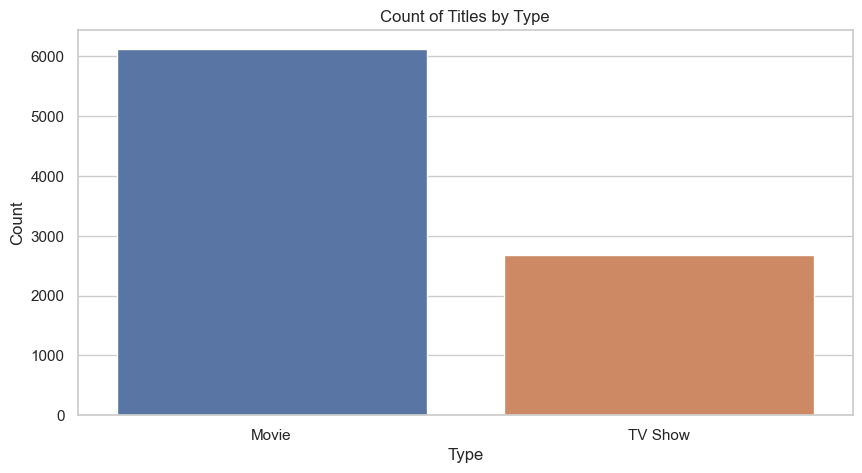

In [7]:
type_counts = df["type"].value_counts(dropna=False)
type_counts

sns.countplot(data=df, x="type", order=type_counts.index)
plt.title("Count of Titles by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Explanation:
#  Shows how many Movies vs TV Shows are in the dataset. Useful for understanding catalog composition.

**Plot Interpretation - Count of Titles by Type**

- The dataset contains significantly more Movies than TV Shows.

- Movies exceed 6,000 titles, whereas TV Shows are fewer than 3,000.

- This indicates that Netflix historically licenses or produces far more movies than multi-season TV content.

- For StreamIntel360, this means the majority of your RAG corpus will be biased toward movies unless balanced sampling is applied.

### Distribution of Release Year

C:\Users\sweet\.anaconda\download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


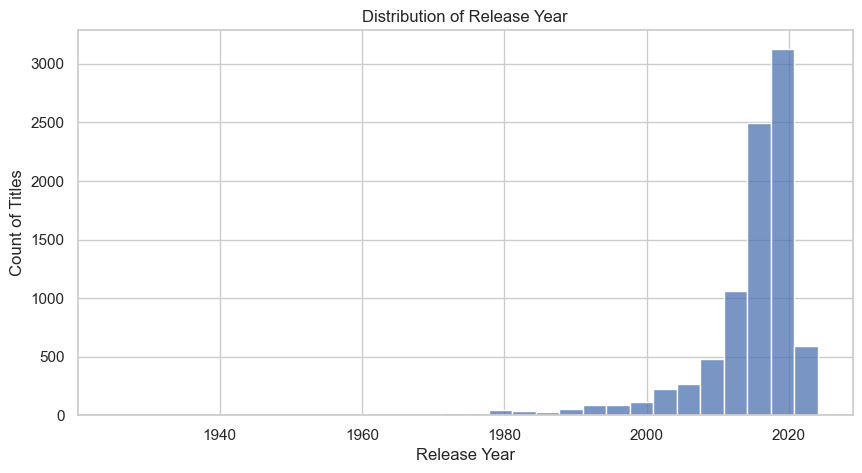

In [8]:
# Filter out any weird or missing years
year_series = df["release_year"].dropna()

sns.histplot(year_series, bins=30, kde=False)
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.show()

# Explanation: 
# Shows where most content is concentrated (e.g., last 20 years).

**Plot Interpretation - Distribution of Release Year**

- Before the early 2000s, Netflix has very few older titles, confirming the platform’s focus on modern content.

- The steep rise after 2010 reinforces Netflix’s aggressive content acquisition strategy.

- The cluster between 2017–2021 dominates, indicating the majority of Netflix’s catalog is relatively new.

- This gives StreamIntel360 a strong temporal signal—recent titles dominate user engagement patterns.

C:\Users\sweet\.anaconda\download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


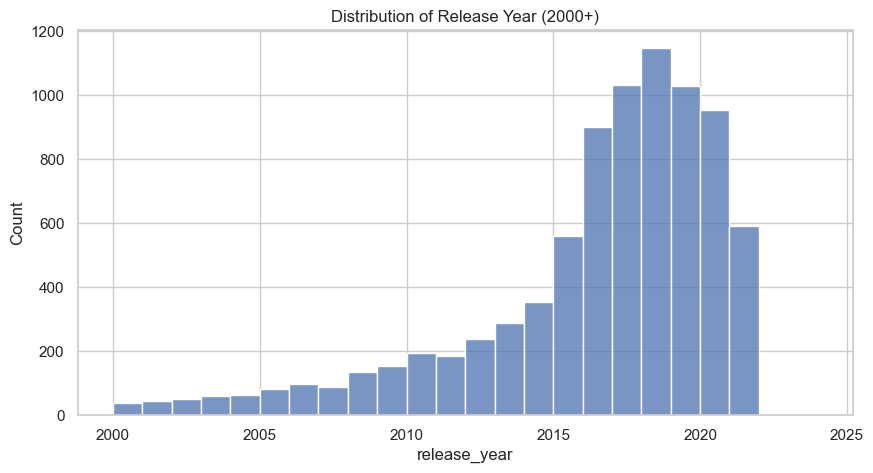

In [9]:
# “Modern streaming era” view
recent = year_series[year_series >= 2000]
sns.histplot(recent, bins=24)
plt.title("Distribution of Release Year (2000+)")
plt.show()

**Plot Interpretation - Distribution of Release Year (2000+)**

- Content production and acquisitions increase sharply after 2010, signaling Netflix’s global expansion period.

- Peak release years occur between 2017 and 2020, showing heavy content output during those years.

- There is a slight decline post-2020, likely reflecting pandemic production slowdowns.

- This suggests the dataset is heavily skewed toward recent titles, which will influence recommendations and trend detection.

### Top Countries by Number of Titles

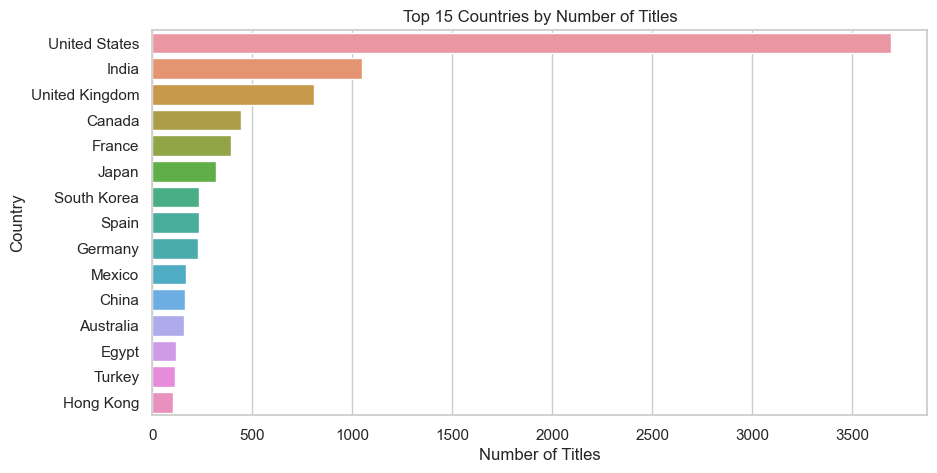

In [10]:
# 'country' column may have multiple countries per row, separated by commas.
# Let's split and explode to count individual countries.

countries_series = (
    df["country"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)

top_countries = countries_series.value_counts().head(15)
top_countries

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 15 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# Explanation: 
# We explode multi-country entries so each country counts individually. This gives a sense of geographic coverage.

**Plot Interpretation - Top 15 Countries by Number of Titles**

- The United States produces more than 3,500 titles, overwhelmingly leading the catalog.

- India and the United Kingdom follow, reflecting Netflix’s focus on global markets with large user bases.

- Countries like Canada, France, Japan, and South Korea also contribute substantial content.

- This distribution highlights Netflix’s international strategy, with content sourced from diverse markets to support regional segmentation and personalization.

### Top Genres / Categories (from `listed_in`)

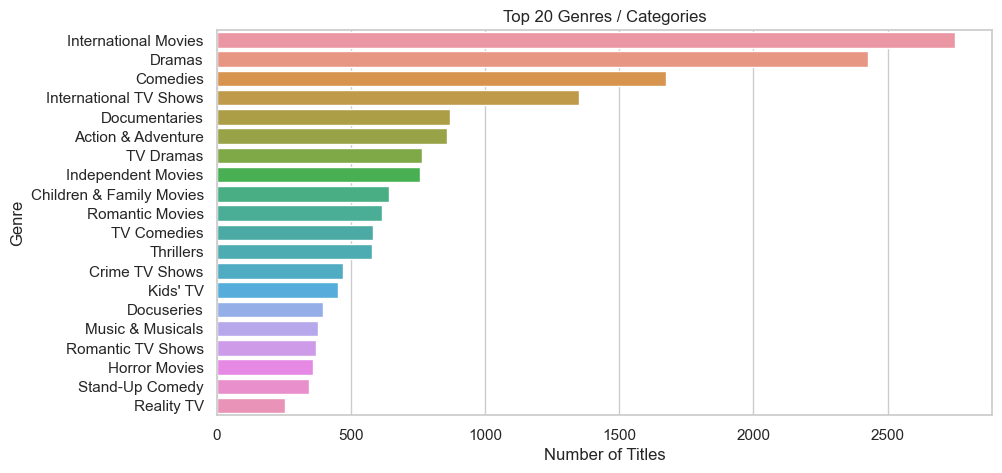

In [11]:
genres_series = (
    df["listed_in"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)

top_genres = genres_series.value_counts().head(20)
top_genres

sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 20 Genres / Categories")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# Explanation: 
# Gives high-level genre distribution for later agent reasoning (e.g., “crime drama,” “kids & family”).

**Plot Interpretation - Top 20 Genres/Categories:**

- International Movies and Dramas are the most common categories, exceeding 2,500 titles each.

- Genres like Comedies, International TV Shows, and Documentaries are also highly represented.

- Family-oriented content (e.g., Children & Family Movies) and niche genres like Music & Musicals and Horror Movies appear in lower volumes.

- This genre distribution shows Netflix’s emphasis on global cinema, high-engagement drama, and broad-appeal comedy/documentary content.

In [12]:
# Sort genres/countries by count (table)
top_countries.head(10)
top_genres.head(20)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64

----------------

## Data Quality Summary

- We inspected missing values and found:
  - Columns with high missingness: `director`, `cast`, `country` (depending on dataset).
  - Columns with low missingness: `title`, `type`, `release_year`, `description`.

- For StreamIntel360:
  - We can rely strongly on: **title**, **type**, **release_year**, **listed_in**, **description**.
  - We may use **country**, **cast**, and **director** when available, but must handle missing values.

These insights inform how we build our RAG corpus and agent prompts.

------------

## Summary

***“What is this catalog we’re working with?”***

**What I did & why?**

**1.Loaded the raw netflix_titles.csv with the correct encoding and selected the real 12 columns.**

- Reason: avoid Unicode errors + stray Unnamed columns and lock in the clean schema that the whole project will rely on.

**2.Inspected structure and data types (df.info, describe).**

- Reason: confirm that important fields like release_year are numeric and that title, type, listed_in, description are usable text.

**3.Checked missing values and % of missingness.**

- Reason: understand which fields are safe for modeling and which must be optional or imputed (director, cast, country).

**4.Plotted distributions:**

- Movie vs TV Show counts.

- Release year distributions (full and recent).

- Top countries and top genres via exploded country and listed_in.

**What have I achieved??**

- Now we can trust the dataset: schema is correct, no weird extra columns, and encodings are clean.

- We know which fields are reliable core signals for RAG and agents (title, type, release_year, listed_in, description).

--------------------

## Conclusion

- The Netflix catalog is dominated by Movies rather than TV Shows, and is strongly dominated by a few key countries and genres.

- The majority of titles are recent, released after 2010, with a strong peak from 2017–2020.

- Data quality is high for core fields but patchy for director, cast, and country, so those must be treated as optional features, and Missingness in director, cast, and country suggests these fields must be handled gracefully in RAG pipelines.

- Content is sourced globally, but the United States, India, and the United Kingdom lead production volume.

- Genres are diverse, but International Movies, Dramas, and Comedies dominate user-facing categories.

- Overall, the dataset reflects Netflix’s strategic shift toward global, modern, genre-diverse content, which is ideal for building strong recommendation systems, RAG context retrieval, and agent reasoning in StreamIntel360.

- This notebook answers: “What does the raw data look like, and is it safe to build models and RAG on top of it?”